# PROBLEM STATEMENT: 
## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable

## Dataset used: World Happiness Report
### Description: The World Happiness Report is a global survey assessing happiness levels, used by governments and organizations for policymaking. It ranks 155 countries based on the Cantril ladder question, where respondents rate their life satisfaction from 0 (worst) to 10 (best). The report's factors, like economic production and social support, explain variations in happiness but don't affect the total score. Dystopia is an imaginary benchmark representing the least-happy country, used for comparisons. Residuals show unexplained variations in happiness. Columns following the Happiness Score, like GDP per Capita and Generosity, describe how specific factors contribute to happiness. Combining these factors yields the happiness score, but modeling them to predict scores may be unreliable.
#### Link: https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the World Happiness Report dataset
data = pd.read_csv("happiness_data/2015.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Conducts basic EDA 
Checking data types and missing values, showing descriptive statistics, calculating the correlation matrix, and creating a pairplot for continuous variables.

In [3]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [69]:
#  Descriptive statistics
print(data.describe())

       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.02

Numerical columns are required for performing correlation analysis because correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two numerical variables. It assesses how changes in one variable are associated with changes in another variable. 

In [13]:
#Selecting the numerical columns:
print("The Integer columns are: ")
data_numerical=data.select_dtypes(np.number)
data_numerical

The Integer columns are: 


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [71]:
#  Correlation matrix (for continuous variables)
correlation_matrix = data_numerical.corr()
correlation_matrix


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


C:\Users\tania\anaconda3\envs\simplilearn\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


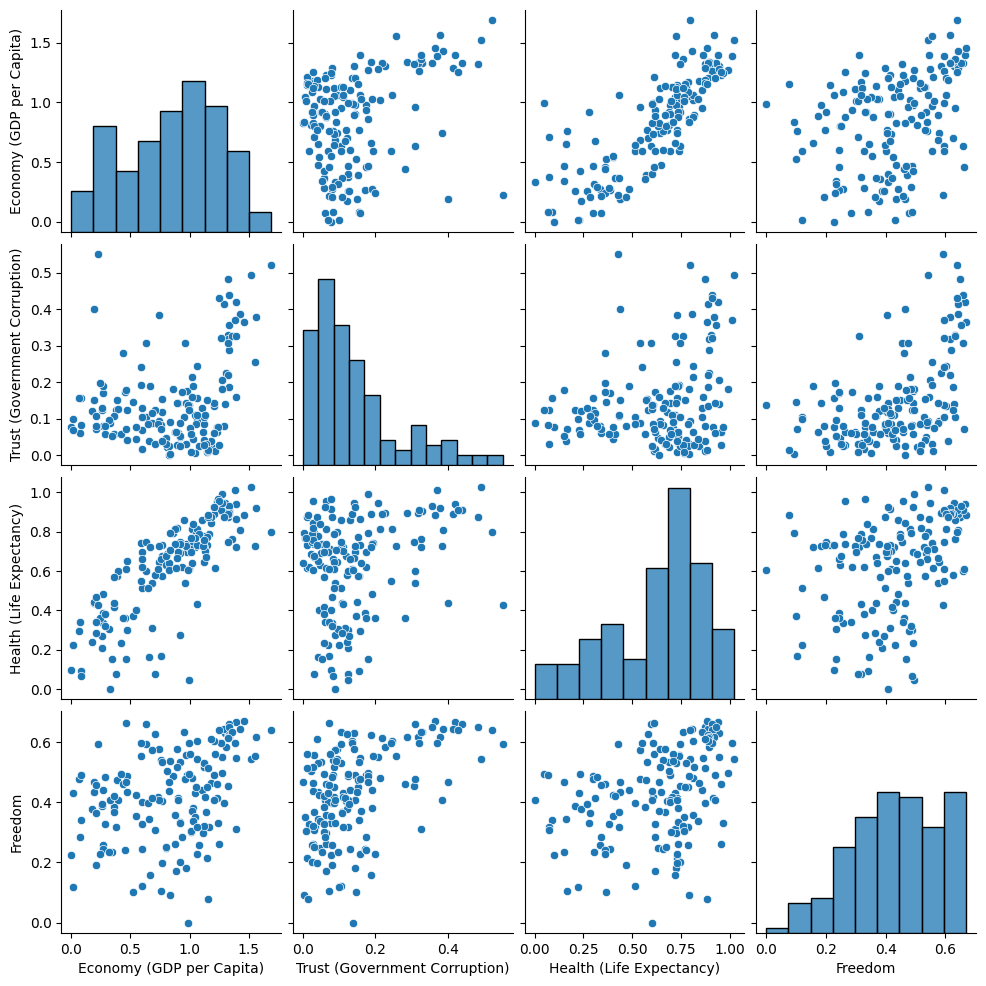

In [46]:
# Pairplot (for continuous variables)

sns.pairplot(data=data, vars=["Economy (GDP per Capita)", "Trust (Government Corruption)", "Health (Life Expectancy)", "Freedom"])


In [18]:
# Checking the names of all the columns
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### Checking the categorical features

In [24]:
data['Country'].nunique() 

158

In [72]:
data['Region'].nunique()

10

In this dataset Region and Country are the categorical features.

In [73]:
# Frequency of each region
data['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

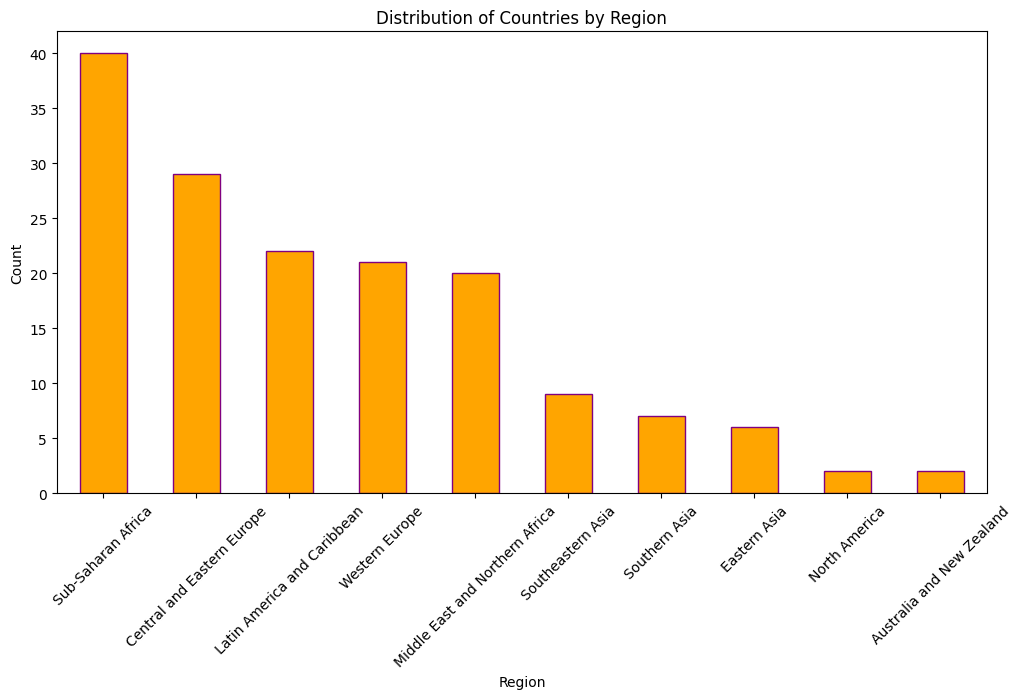

In [43]:
# Visualization: Create multiple bar charts and histograms
# Example: Visualizing the distribution of "Region" (Categorical) and "Happiness Score" (Continuous)

# Bar chart for "Region" distribution
plt.figure(figsize=(12, 6))
data['Region'].value_counts().plot(kind='bar',color='orange', edgecolor='purple')
plt.title("Distribution of Countries by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

From the above Bar Chart we see that Sub_Saharan Africa has the highest frequency and Australia and New Zealand has the least.

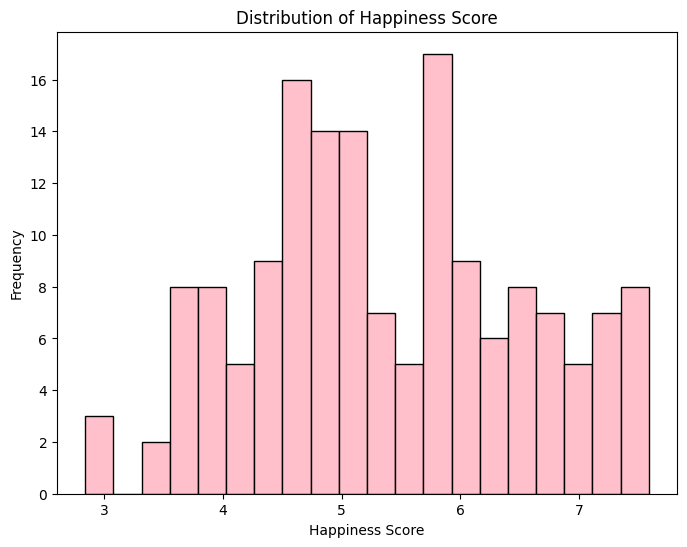

In [37]:
# Histogram for "Life Ladder" distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Happiness Score'], bins=20, color='pink', edgecolor='black')
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

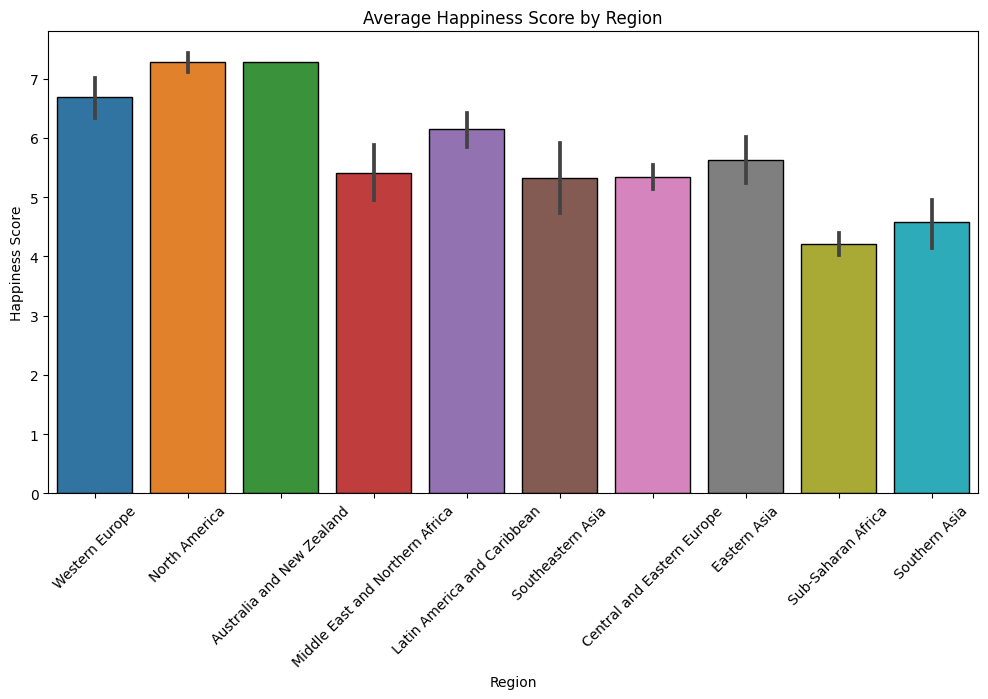

In [61]:
# Create a bar chart to visualize the average happiness score by region
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Region', y='Happiness Score',errorbar=('ci', 95),edgecolor='black')
plt.title("Average Happiness Score by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()

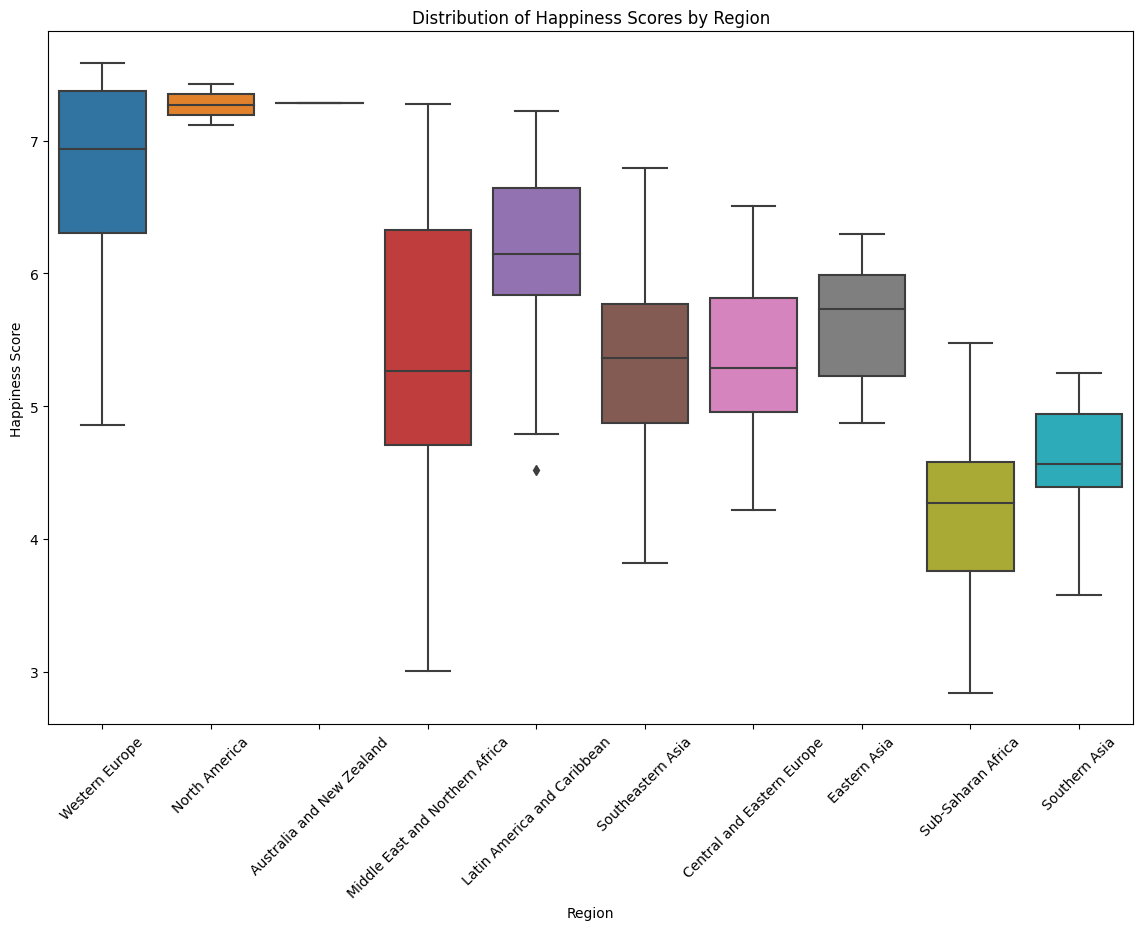

In [65]:
# Create a box plot to visualize the distribution of happiness scores by region
plt.figure(figsize=(14, 9))
sns.boxplot(data=data,  x='Region', y='Happiness Score')
plt.title("Distribution of Happiness Scores by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()

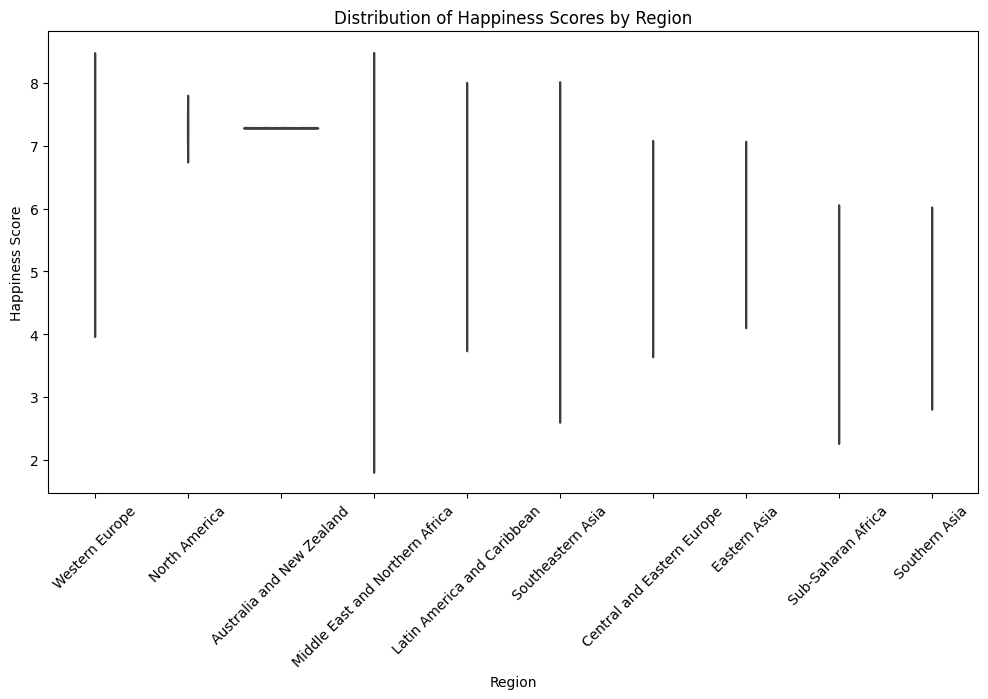

In [68]:
# Create a violin plot to visualize the distribution of happiness scores by region
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Region', y='Happiness Score', inner='quartile')
plt.title("Distribution of Happiness Scores by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()